# Installation of libraries

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install torch-geometric
#for CUDA Version: 12.4  , change this according to your cuda version

Looking in indexes: https://download.pytorch.org/whl/cu121
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 112.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6

In [ ]:
!nvidia-smi


Thu Feb  6 09:26:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

In [ ]:
import torch
import torch_geometric
from torch_geometric.nn import GATConv
#import torch_geometric.nn.models.tgn
from torch_geometric.nn.models import TGNMemory


print("Torch version:", torch.__version__)
print("Torch CUDA availability:", torch.cuda.is_available())
print("Torch Geometric version:", torch_geometric.__version__)

Torch version: 2.5.1+cu121
Torch CUDA availability: True
Torch Geometric version: 2.6.1


# **LOADIND DATA**

In [ ]:
# Load ECG Data
ecg_data = pd.read_csv("mitbih_test.csv")
#clinical_data = pd.read_csv("heart_disease_uci.csv")

# **EDA**

In [ ]:
ecg_data.describe()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
count,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,...,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000
mean,0.894405,0.761902,0.426641,0.221606,0.201682,0.209897,0.204811,0.200999,0.197640,0.196030,...,0.004588,0.004328,0.004020,0.003789,0.003639,0.003459,0.003167,0.003000,0.002946,0.473711
std,0.234564,0.218664,0.228568,0.208710,0.177730,0.172195,0.177948,0.176143,0.170229,0.166707,...,0.043129,0.042188,0.040256,0.039398,0.038536,0.037718,0.035904,0.035523,0.035267,1.143469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924254,0.683355,0.251220,0.050514,0.082873,0.087912,0.072678,0.066003,0.064516,0.068506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432781,0.167641,0.147651,0.158120,0.144068,0.144509,0.150442,0.149038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912320,0.583994,0.347097,0.259227,0.287356,0.298456,0.294566,0.289907,0.282966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


In [ ]:
ecg_data.shape[0]

21891

In [ ]:
# Preprocessing ECG Data
X_ecg = ecg_data.iloc[:, :-1].values  # Features
y_ecg = ecg_data.iloc[:, -1].values   # Labels

# Standardizing ECG Data
scaler = StandardScaler()
X_ecg = scaler.fit_transform(X_ecg)

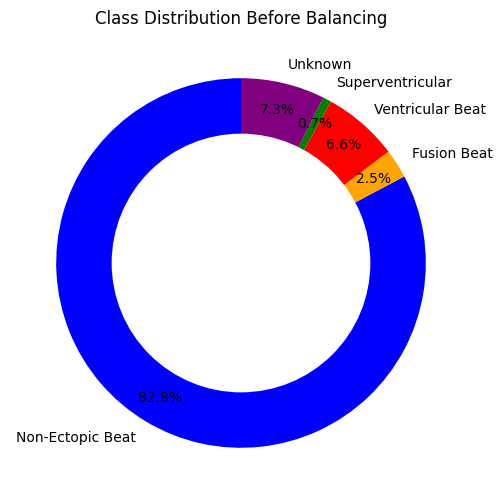

In [ ]:
# ----------------------- VISUALIZE CLASS DISTRIBUTION ------------------------
def plot_donut_chart(y, title):
    labels = ["Non-Ectopic Beat", "Fusion Beat", "Ventricular Beat", "Superventricular", "Unknown"]
    unique, counts = np.unique(y, return_counts=True)
    class_counts = dict(zip(unique, counts))

    plt.figure(figsize=(6,6))
    plt.pie(class_counts.values(), labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=['blue', 'orange', 'red', 'green', 'purple'])
    plt.gca().add_artist(plt.Circle((0,0), 0.70, fc='white'))  # Create Donut Effect
    plt.title(title)
    plt.show()


# Plot Before Balancing
plot_donut_chart(y_ecg, "Class Distribution Before Balancing")


# DATA AUGMENTATION FOR ECG

In [ ]:
from sklearn.utils import resample
# Function to apply Jittering, Scaling, and Time-Warping
def augment_ecg(signal):
    noise = np.random.normal(0, 0.01, signal.shape)  # Jittering
    scaling_factor = np.random.uniform(0.9, 1.1)  # Scaling
    return (signal + noise) * scaling_factor

# Resample Minority Classes
def balance_data(X, y):
    df = pd.DataFrame(X)
    df['label'] = y

    df_majority = df[df['label'] == 0]  # Non-Ectopic Beat (majority)
    df_fusion = df[df['label'] == 1]
    df_ventricular = df[df['label'] == 2]
    df_superventricular = df[df['label'] == 3]
    df_unknown = df[df['label'] == 4]

    target_size = len(df_majority)  # Make all classes match the majority class


    # Upsample Minority Classes
    df_fusion = resample(df_fusion, replace=True, n_samples=target_size, random_state=42)
    df_ventricular = resample(df_ventricular, replace=True, n_samples=target_size, random_state=42)
    df_superventricular = resample(df_superventricular, replace=True, n_samples=target_size, random_state=42)
    df_unknown = resample(df_unknown, replace=True, n_samples=target_size, random_state=42)


    # Apply Augmentation
    df_fusion.iloc[:, :-1] = df_fusion.iloc[:, :-1].apply(augment_ecg, axis=1)
    df_ventricular.iloc[:, :-1] = df_ventricular.iloc[:, :-1].apply(augment_ecg, axis=1)
    df_superventricular.iloc[:, :-1] = df_superventricular.iloc[:, :-1].apply(augment_ecg, axis=1)
    df_unknown.iloc[:, :-1] = df_unknown.iloc[:, :-1].apply(augment_ecg, axis=1)

    # Combine Data
    df_balanced = pd.concat([df_majority, df_fusion, df_ventricular, df_superventricular, df_unknown])
    return df_balanced.iloc[:, :-1].values, df_balanced.iloc[:, -1].values

In [ ]:
# Balance Data & Apply Augmentation
X_train, y_train = balance_data(X_ecg, y_ecg)


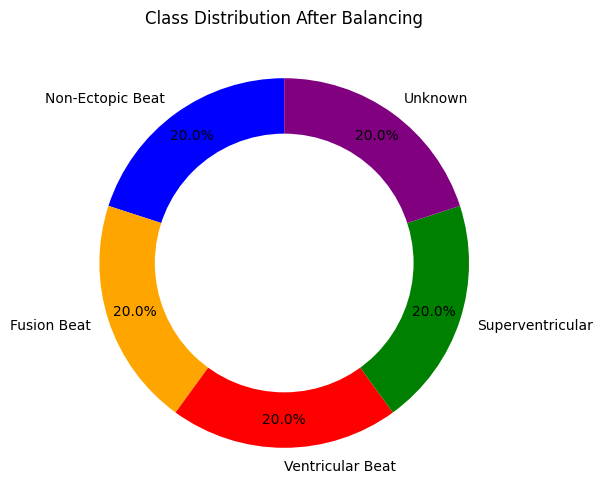

In [ ]:
# Plot After Balancing
plot_donut_chart(y_train, "Class Distribution After Balancing")

# **Spliting into train and test**

In [ ]:
y_train.shape[0]

90585

In [ ]:
# Train-Test Split
X_ecg_train, X_ecg_test, y_ecg_train, y_ecg_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def add_jitter(X, noise_level=0.05):
    return X + noise_level * np.random.normal(size=X.shape)
X_ecg_train = add_jitter(X_ecg_train)



In [ ]:
# Now, split Train into Train and Validation
X_ecg_train, X_ecg_val, y_ecg_train, y_ecg_val = train_test_split(
    X_ecg_train, y_ecg_train, test_size=0.2, random_state=42  # 20% of train is validation
)

In [ ]:
#Convert Data to Torch Tensors for ecg
X_ecg_train, X_ecg_test = torch.tensor(X_ecg_train, dtype=torch.float32), torch.tensor(X_ecg_test, dtype=torch.float32)
y_ecg_train, y_ecg_test = torch.tensor(y_ecg_train, dtype=torch.long), torch.tensor(y_ecg_test, dtype=torch.long)


In [ ]:
# Convert Data to Torch Tensors (Train, Validation, and Test)
X_ecg_train = torch.tensor(X_ecg_train, dtype=torch.float32)
X_ecg_val = torch.tensor(X_ecg_val, dtype=torch.float32)
X_ecg_test = torch.tensor(X_ecg_test, dtype=torch.float32)

y_ecg_train = torch.tensor(y_ecg_train, dtype=torch.long)
y_ecg_val = torch.tensor(y_ecg_val, dtype=torch.long)
y_ecg_test = torch.tensor(y_ecg_test, dtype=torch.long)


<ipython-input-14-da63aa9d174b>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_ecg_train = torch.tensor(X_ecg_train, dtype=torch.float32)
<ipython-input-14-da63aa9d174b>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_ecg_test = torch.tensor(X_ecg_test, dtype=torch.float32)
<ipython-input-14-da63aa9d174b>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_ecg_train = torch.tensor(y_ecg_train, dtype=torch.long)
<ipython-input-14-da63aa9d174b>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clon

# convert to graph

In [ ]:
from sklearn.neighbors import kneighbors_graph
def create_ecg_graph_knn(X, y, k=5):
    adj_matrix = kneighbors_graph(X, k, mode='connectivity', include_self=True).toarray()
    edge_index = np.array(np.nonzero(adj_matrix))

    node_features = torch.tensor(X, dtype=torch.float32)
    labels = torch.tensor(y, dtype=torch.long)

    graph = Data(x=node_features, edge_index=torch.tensor(edge_index, dtype=torch.long), y=labels)
    return graph

# Create ECG Graphs for Train & Test Data
# Create ECG Graphs for Train & Test Data
ecg_train_graph = create_ecg_graph_knn(X_ecg_train, y_ecg_train)
ecg_test_graph = create_ecg_graph_knn(X_ecg_test, y_ecg_test)



<ipython-input-15-af90cc2e3e89>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_features = torch.tensor(X, dtype=torch.float32)
<ipython-input-15-af90cc2e3e89>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y, dtype=torch.long)
<ipython-input-15-af90cc2e3e89>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_features = torch.tensor(X, dtype=torch.float32)
<ipython-input-15-af90cc2e3e89>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.

In [ ]:
# Create Graphs
ecg_train_graph = create_ecg_graph_knn(X_ecg_train, y_ecg_train)
ecg_val_graph = create_ecg_graph_knn(X_ecg_val, y_ecg_val)
ecg_test_graph = create_ecg_graph_knn(X_ecg_test, y_ecg_test)

<ipython-input-15-af90cc2e3e89>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_features = torch.tensor(X, dtype=torch.float32)
<ipython-input-15-af90cc2e3e89>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y, dtype=torch.long)
<ipython-input-15-af90cc2e3e89>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_features = torch.tensor(X, dtype=torch.float32)
<ipython-input-15-af90cc2e3e89>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.

# DEFINE TRAIN TEMPORAL GRAPH NETWORK (TGN)

In [ ]:
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv

In [ ]:
# Define the TGN model
class TGN(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super(TGN, self).__init__()
        self.conv1 = GCNConv(in_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x


In [ ]:
class ECG_TGN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ECG_TGN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.3)  # Prevent Overfitting
        self.bn = nn.BatchNorm1d(hidden_dim)  # Normalize

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = self.bn(F.relu(x))
        x = self.conv2(x, edge_index)
        x = self.dropout(F.relu(x))
        x = self.fc(x)
        return x





# Model Initialization and training

In [ ]:
# Model Initialization
ecg_model = ECG_TGN(input_dim=187, hidden_dim= 256, output_dim=5)
#clinical_model = Clinical_GAT(input_dim=X_clinical.shape[1], hidden_dim=64, output_dim=5)

In [ ]:
# Define Optimization and Loss Function
criterion = nn.CrossEntropyLoss()
ecg_optimizer = torch.optim.AdamW(ecg_model.parameters(), lr=0.0009, weight_decay=1e-4)
#ecg_optimizer = optim.Adam(ecg_model.parameters(), lr=0.001)
#clinical_optimizer = optim.Adam(clinical_model.parameters(), lr=0.001)

In [ ]:
from torchvision.ops import sigmoid_focal_loss  # Torchvision's focal loss
import torch.nn.functional as F
from torchvision.ops import sigmoid_focal_loss

# Function to convert class indices to one-hot
def one_hot_encoding(y, num_classes):
    return F.one_hot(y, num_classes=num_classes).float()  # Convert to float for Focal Loss


In [ ]:
def train_model_ecg(model, optimizer, data, epochs=10):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(data)  # Now passing the entire graph data
        # Convert target labels to one-hot
        target_one_hot = one_hot_encoding(data.y, num_classes)
        loss = sigmoid_focal_loss(output, target_one_hot, alpha=0.25, gamma=2.0, reduction="mean")
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


# def train_model_clinal(model, optimizer, data, epochs=10):
#     model.train()
#     for epoch in range(epochs):
#         optimizer.zero_grad()
#         output = model(data.x, data.edge_index)  # Pass both node features and edge index
#         loss = criterion(output, data.y)
#         loss.backward()
#         optimizer.step()
#         print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


In [ ]:
# Training function with early stopping
def train_model_ecg(model, optimizer, train_data, val_data, num_classes, epochs=50, patience=5):
    model.train()
    best_val_loss = float("inf")  # Track the best validation loss
    no_improve_count = 0  # Count epochs without improvement

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_data)  # Forward pass

        # Convert labels to one-hot
        target_one_hot = one_hot_encoding(train_data.y, num_classes)

        # Compute Focal Loss
        loss = sigmoid_focal_loss(output, target_one_hot, alpha=0.25, gamma=2.0, reduction="mean")
        loss.backward()
        optimizer.step()

        # Validation Phase
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            val_output = model(val_data)
            val_target_one_hot = one_hot_encoding(val_data.y, num_classes)
            val_loss = sigmoid_focal_loss(val_output, val_target_one_hot, alpha=0.25, gamma=2.0, reduction="mean")

        # Print Losses
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

        # Early Stopping Logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improve_count = 0  # Reset counter
        else:
            no_improve_count += 1  # Increment if no improvement

        if no_improve_count >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break  # Stop training

        model.train()  # Switch back to training mode


In [ ]:
num_classes = 5  # Adjust based on your dataset
train_model_ecg(ecg_model, ecg_optimizer, ecg_train_graph, ecg_val_graph, num_classes, epochs=75, patience=5)

Epoch 1/75, Train Loss: 0.0163, Val Loss: 0.0152
Epoch 2/75, Train Loss: 0.0157, Val Loss: 0.0149
Epoch 3/75, Train Loss: 0.0152, Val Loss: 0.0145
Epoch 4/75, Train Loss: 0.0146, Val Loss: 0.0141
Epoch 5/75, Train Loss: 0.0143, Val Loss: 0.0137
Epoch 6/75, Train Loss: 0.0138, Val Loss: 0.0134
Epoch 7/75, Train Loss: 0.0134, Val Loss: 0.0131
Epoch 8/75, Train Loss: 0.0130, Val Loss: 0.0129
Epoch 9/75, Train Loss: 0.0127, Val Loss: 0.0126
Epoch 10/75, Train Loss: 0.0123, Val Loss: 0.0123
Epoch 11/75, Train Loss: 0.0120, Val Loss: 0.0120
Epoch 12/75, Train Loss: 0.0117, Val Loss: 0.0118
Epoch 13/75, Train Loss: 0.0114, Val Loss: 0.0116
Epoch 14/75, Train Loss: 0.0111, Val Loss: 0.0113
Epoch 15/75, Train Loss: 0.0109, Val Loss: 0.0111
Epoch 16/75, Train Loss: 0.0106, Val Loss: 0.0109
Epoch 17/75, Train Loss: 0.0103, Val Loss: 0.0107
Epoch 18/75, Train Loss: 0.0100, Val Loss: 0.0105
Epoch 19/75, Train Loss: 0.0098, Val Loss: 0.0103
Epoch 20/75, Train Loss: 0.0096, Val Loss: 0.0101
Epoch 21/

In [ ]:
torch.save(ecg_model.state_dict(), "ecg_model.pth")


In [ ]:
#to load model
ecg_model.load_state_dict(torch.load("ecg_model.pth"))
ecg_model.eval()  # Set to evaluation mode


<ipython-input-72-62ddee265c70>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ecg_model.load_state_dict(torch.load("ecg_model.pth"))


ECG_TGN(
  (conv1): GCNConv(187, 256)
  (conv2): GCNConv(256, 256)
  (fc): Linear(in_features=256, out_features=5, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

# Testing and evaluation

In [ ]:
def calculate_accuracy(output, labels):
    _, predicted = torch.max(output, dim=1)  # Get the predicted class
    correct = (predicted == labels).sum().item()  # Count correct predictions
    accuracy = correct / labels.size(0)  # Calculate accuracy
    return accuracy

def test_model_ecg(model, data):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to compute gradients during testing
        output = model(data)  # Forward pass
        accuracy = calculate_accuracy(output, data.y)  # Calculate accuracy
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

def test_model_clinical(model, data):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to compute gradients during testing
        output = model(data.x, data.edge_index)  # Forward pass
        accuracy = calculate_accuracy(output, data.y)  # Calculate accuracy
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# After training models, call the test functions
test_model_ecg(ecg_model, ecg_test_graph)
#test_model_clinical(clinical_model, clinical_test_graph)


Test Accuracy: 96.20%


In [ ]:
from sklearn.metrics import classification_report

# Function to evaluate model and generate classification report
def evaluate_model_ecg(model, test_data, num_classes):
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        logits = model(test_data)  # Get raw model outputs
        preds = torch.argmax(logits, dim=1).cpu().numpy()  # Convert logits to class predictions
        true_labels = test_data.y.cpu().numpy()  # Ground truth labels

    # Generate Classification Report
    report = classification_report(true_labels, preds, digits=4)
    print("ECG Classification Report:\n", report)

# Call the function to evaluate on test set
evaluate_model_ecg(ecg_model, ecg_test_graph, num_classes)


ECG Classification Report:
               precision    recall  f1-score   support

           0     0.9179    0.9325    0.9252      3587
           1     0.9677    0.9453    0.9564      3709
           2     0.9635    0.9635    0.9635      3643
           3     0.9846    0.9883    0.9864      3679
           4     0.9832    0.9874    0.9853      3499

    accuracy                         0.9633     18117
   macro avg     0.9634    0.9634    0.9634     18117
weighted avg     0.9634    0.9633    0.9633     18117



AUC-ROC Score: 0.9967


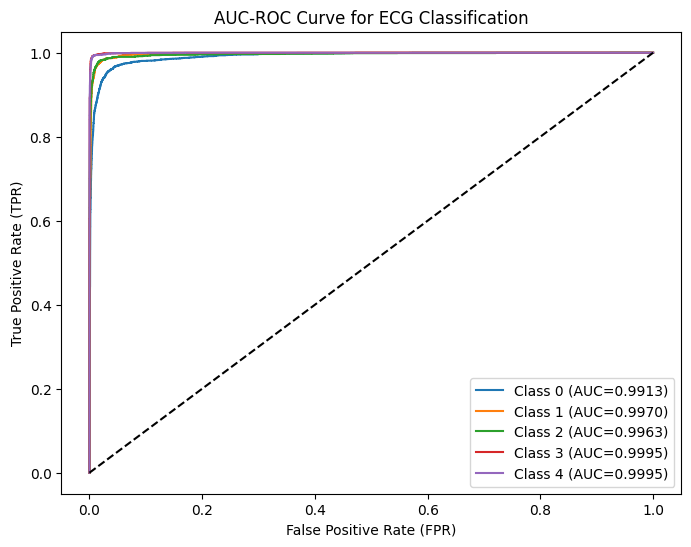

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Function to compute and plot the AUC-ROC curve
def plot_auc_roc(model, test_data, num_classes):
    model.eval()  # Set to evaluation mode

    with torch.no_grad():
        logits = model(test_data)  # Get raw outputs (logits)
        probs = F.softmax(logits, dim=1).cpu().numpy()  # Convert logits to probabilities
        true_labels = test_data.y.cpu().numpy()  # Ground truth labels (integer)

    # Convert integer labels to one-hot encoding for multi-class AUC calculation
    true_labels_one_hot = one_hot_encoding(torch.tensor(true_labels), num_classes).cpu().numpy()

    # Compute AUC score
    auc_score = roc_auc_score(true_labels_one_hot, probs, multi_class="ovr")
    print(f"AUC-ROC Score: {auc_score:.4f}")

    # Plot ROC Curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(true_labels_one_hot[:, i], probs[:, i])  # Get FPR & TPR
        plt.plot(fpr, tpr, label=f'Class {i} (AUC={roc_auc_score(true_labels_one_hot[:, i], probs[:, i]):.4f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random chance)
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("AUC-ROC Curve for ECG Classification")
    plt.legend()
    plt.show()

# Call the function to plot the AUC-ROC curve
plot_auc_roc(ecg_model, ecg_test_graph, num_classes)


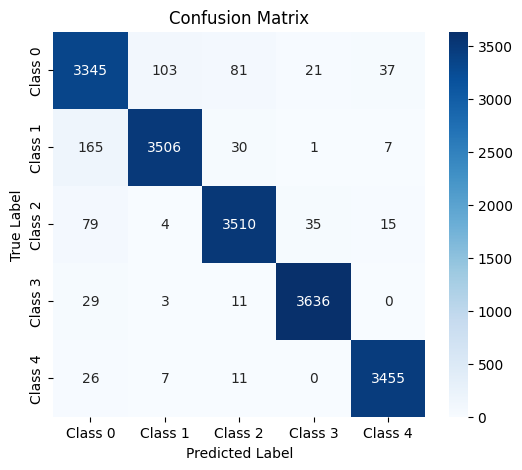

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, test_data, num_classes):
    model.eval()

    with torch.no_grad():
        logits = model(test_data)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        true_labels = test_data.y.cpu().numpy()

    cm = confusion_matrix(true_labels, preds)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(num_classes)],
                yticklabels=[f"Class {i}" for i in range(num_classes)])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Call the function
plot_confusion_matrix(ecg_model, ecg_test_graph, num_classes)


In [ ]:
from sklearn.metrics import matthews_corrcoef

def compute_mcc(model, test_data):
    model.eval()

    with torch.no_grad():
        logits = model(test_data)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        true_labels = test_data.y.cpu().numpy()

    mcc = matthews_corrcoef(true_labels, preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

compute_mcc(ecg_model, ecg_test_graph)


Matthews Correlation Coefficient (MCC): 0.9541


In [ ]:
from sklearn.metrics import cohen_kappa_score

def compute_kappa(model, test_data):
    model.eval()

    with torch.no_grad():
        logits = model(test_data)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        true_labels = test_data.y.cpu().numpy()

    kappa = cohen_kappa_score(true_labels, preds)
    print(f"Cohen’s Kappa Score: {kappa:.4f}")

compute_kappa(ecg_model, ecg_test_graph)


Cohen’s Kappa Score: 0.9541


# LIME

In [ ]:
!pip install graphlime
!pip install lime
!lime.lime_tabular

/bin/bash: line 1: lime.lime_tabular: command not found


In [ ]:
import torch
import torch.nn.functional as F
from graphlime import GraphLIME
from torch_geometric.data import Data
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# Ensure model is in evaluation mode
ecg_model.eval()


ECG_TGN(
  (conv1): GCNConv(187, 256)
  (conv2): GCNConv(256, 256)
  (fc): Linear(in_features=256, out_features=5, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [ ]:
def get_node_embeddings(ecg_model, data):
    ecg_model.eval()
    with torch.no_grad():
        x = ecg_model.conv1(data.x, data.edge_index)
        x = ecg_model.bn(F.relu(x))
        x = ecg_model.conv2(x, data.edge_index)
    return x.cpu().numpy()  # Convert to NumPy for LIME


In [ ]:
node_embeddings = get_node_embeddings(ecg_model, ecg_test_graph)
y_labels = ecg_test_graph.y.cpu().numpy()  # True labels


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=node_embeddings,
    mode="classification",
    feature_names=[f"freq_{i}" for i in range(node_embeddings.shape[1])],
    class_names=["Non-Ectopic Beat", "Fusion Beat", "Ventricular Beat", "Superventricular", "Unknown"],  # Modify based on your dataset
    discretize_continuous=True
)


In [ ]:
def predict_proba_fn(node_embeddings):
    logits = ecg_model.fc(torch.tensor(node_embeddings, dtype=torch.float32)).detach().numpy()
    return torch.softmax(torch.tensor(logits), dim=1).numpy()  # Convert logits to probabilities

node_id = 10  # Select a node
exp = explainer.explain_instance(
    node_embeddings[node_id],
    predict_proba_fn
)
exp.show_in_notebook()


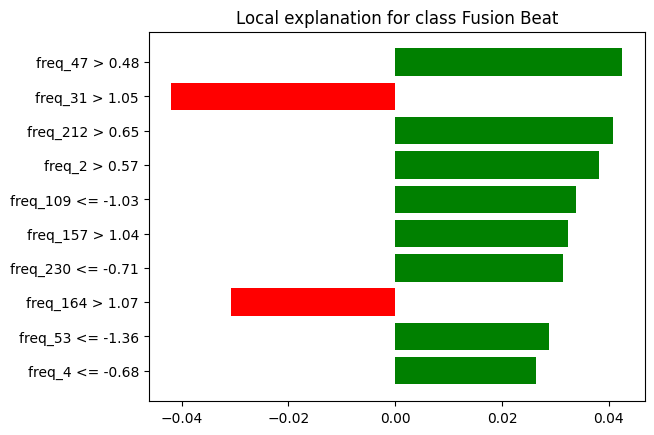

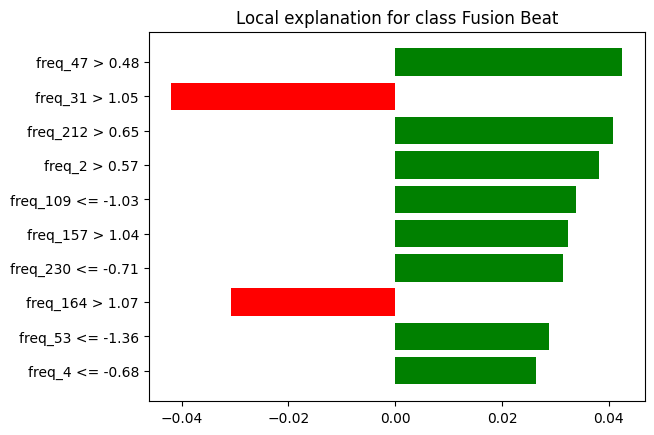

In [ ]:
exp.as_pyplot_figure()


# PR Curve

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


ECG Classification Report:
               precision    recall  f1-score   support

           0     0.9131    0.9320    0.9225      3587
           1     0.9673    0.9415    0.9542      3709
           2     0.9635    0.9627    0.9631      3643
           3     0.9846    0.9897    0.9871      3679
           4     0.9820    0.9846    0.9833      3499

    accuracy                         0.9620     18117
   macro avg     0.9621    0.9621    0.9620     18117
weighted avg     0.9622    0.9620    0.9620     18117



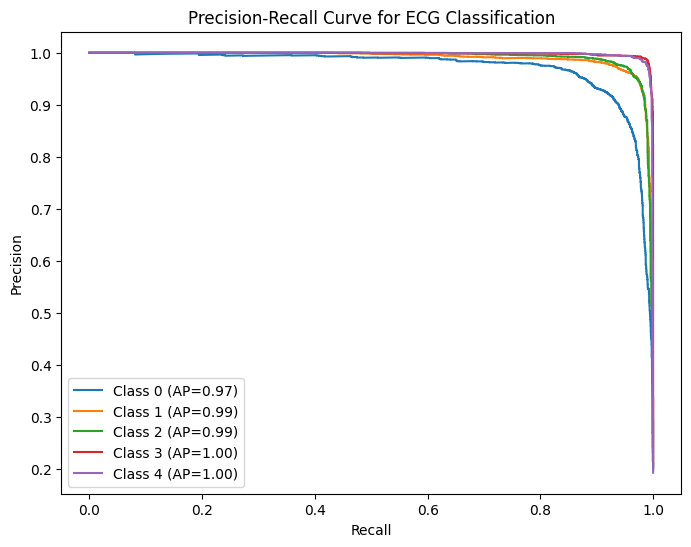

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report

# Function to evaluate model and generate PR curve
def evaluate_model_with_pr(ecg_model, test_data, num_classes):
    ecg_model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        logits = ecg_model(test_data)  # Get raw model outputs
        probs = torch.softmax(logits, dim=1).cpu().numpy()  # Convert logits to probabilities
        preds = np.argmax(probs, axis=1)  # Convert probabilities to class predictions
        true_labels = test_data.y.cpu().numpy()  # Ground truth labels

    # Generate Classification Report
    report = classification_report(true_labels, preds, digits=4)
    print("ECG Classification Report:\n", report)

    # Compute PR Curve for Multi-Class
    precision, recall, avg_precision = {}, {}, {}
    plt.figure(figsize=(8, 6))

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels == i, probs[:, i])
        avg_precision[i] = average_precision_score(true_labels == i, probs[:, i])

        plt.plot(recall[i], precision[i], label=f'Class {i} (AP={avg_precision[i]:.2f})')

    # Plot PR Curve
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for ECG Classification')
    plt.legend()
    plt.show()

# Call function to evaluate and plot PR curve
evaluate_model_with_pr(ecg_model, ecg_test_graph, 5)
